In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

In [ ]:
!pip install kaggle

In [ ]:
%cd /content/drive/MyDrive/dataset/kaggle/

/content/drive/MyDrive/dataset/kaggle


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/dataset/kaggle/"

In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

In [ ]:
!unzip \*.zip  && rm *.zip

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

In [ ]:
train_dataset_path='/content/drive/MyDrive/dataset/kaggle/Face Mask Dataset/Train'
width=height=224
batch_size=32

idg=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.8,1.2),
    zoom_range=0.1,
    shear_range=0.3,
    rotation_range=10,
    validation_split=0.2

)
val_dataset_path='/content/drive/MyDrive/dataset/kaggle/Face Mask Dataset/Validation'
width=height=224
batch_size=32

idg=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.8,1.2),
    zoom_range=0.1,
    shear_range=0.3,
    rotation_range=10,
    validation_split=0.2

)

train_data=idg.flow_from_directory(
    train_dataset_path,
    target_size=(width,height),
    class_mode='categorical',
    batch_size=batch_size,
    subset='training',
    
)
val_data=idg.flow_from_directory(
    val_dataset_path,
    target_size=(width,height),
    class_mode='categorical',
    batch_size=batch_size,
    subset='validation',
    
)

Found 8000 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


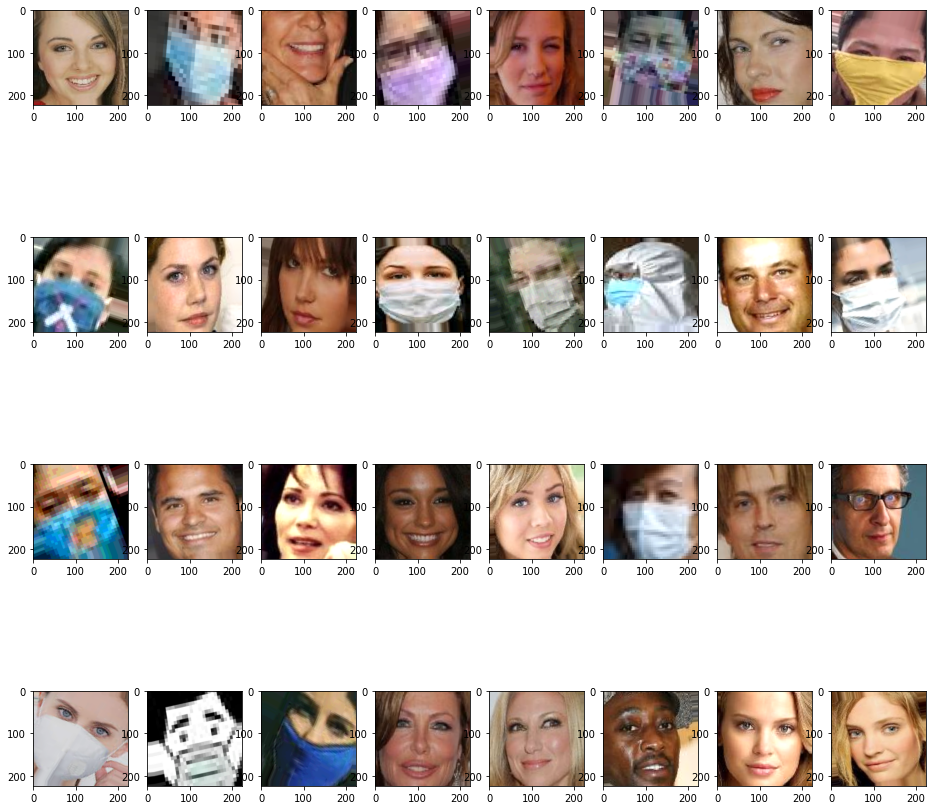

In [ ]:
some_images=next(train_data)
X=some_images[0]
Y=some_images[1]

plt.figure(figsize=(16,16))
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.imshow(X[i])

In [ ]:
base_model=tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(width,height,3),

)

In [ ]:
for layer in base_model.layers[:-4]:
    layer.trainable=False
  

In [ ]:
model=tf.keras.models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(1024,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(2,activation='softmax')
]
    
)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              25691136  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 40,407,874
Trainable params: 32,772,610
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
output=model.fit(train_data,validation_data=val_data,epochs=10)

Epoch 1/10
250/250 [==============================] - 4122s 16s/step - loss: 0.1166 - accuracy: 0.9615 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 2/10
250/250 [==============================] - 165s 660ms/step - loss: 0.0324 - accuracy: 0.9921 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 3/10
250/250 [==============================] - 166s 664ms/step - loss: 0.0257 - accuracy: 0.9940 - val_loss: 0.0202 - val_accuracy: 0.9937
Epoch 4/10
250/250 [==============================] - 169s 674ms/step - loss: 0.0229 - accuracy: 0.9961 - val_loss: 3.3276e-06 - val_accuracy: 1.0000
Epoch 5/10
250/250 [==============================] - 165s 658ms/step - loss: 0.0267 - accuracy: 0.9971 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 6/10
250/250 [==============================] - 166s 663ms/step - loss: 0.0198 - accuracy: 0.9964 - val_loss: 1.5646e-08 - val_accuracy: 1.0000
Epoch 7/10
250/250 [==============================] - 166s 663ms/step - loss: 0.0235 - accuracy: 0.9966 - val_loss: 3

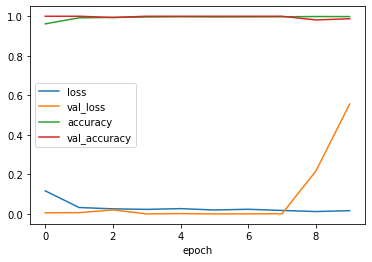

In [ ]:
plt.plot(output.history['loss'],label='train_loss')
plt.plot(output.history["val_loss"], label="val_loss")
plt.plot(output.history['accuracy'],label='train_acc')
plt.plot(output.history["val_accuracy"], label="val_acc")
plt.xlabel('epoch')
plt.legend(['loss','val_loss','accuracy','val_accuracy'], loc='center left')
plt.show()

In [ ]:
model.save('FaceMaskDetection.h5')

In [ ]:
test_dataset_path='/content/drive/MyDrive/dataset/kaggle/Face Mask Dataset/Test'
width=height=224
batch_size=32

idg=ImageDataGenerator(
    rescale=1./255,
  

)

test_data=idg.flow_from_directory(
    test_dataset_path,
    target_size=(width,height),
    class_mode='categorical',
    batch_size=batch_size,
   
    
)

Found 992 images belonging to 2 classes.


In [ ]:
model.evaluate(test_data)

31/31 [==============================] - 296s 10s/step - loss: 0.3531 - accuracy: 0.9879


[0.35305821895599365, 0.9879032373428345]